## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.


Here we'll dive into the basic principles of machine learning, and how to
utilize them via the Scikit-Learn API.

After briefly introducing scikit-learn's *Estimator* object, we'll cover **supervised learning**, including *classification* and *regression* problems.

## About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [2]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [30]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [4]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [5]:
x = np.arange(10)
y = 2 * x + 1

In [6]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


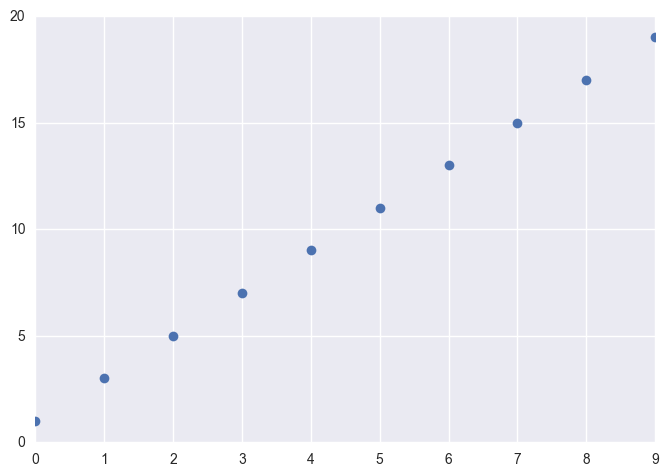

In [7]:
plt.plot(x, y, 'o');

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

In [8]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [31]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [10]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[ 2.00000002]
0.999999902313


In [34]:
# residual error around fit
model.residues_ 

C:\Users\mar\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


26.850085586515259

The model found a line with a slope 2 and intercept 1, as we'd expect.

## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

### Regression 

One of the simplest regression problems is fitting a line to data, which we saw above.
Scikit-learn also contains more sophisticated regression algorithms

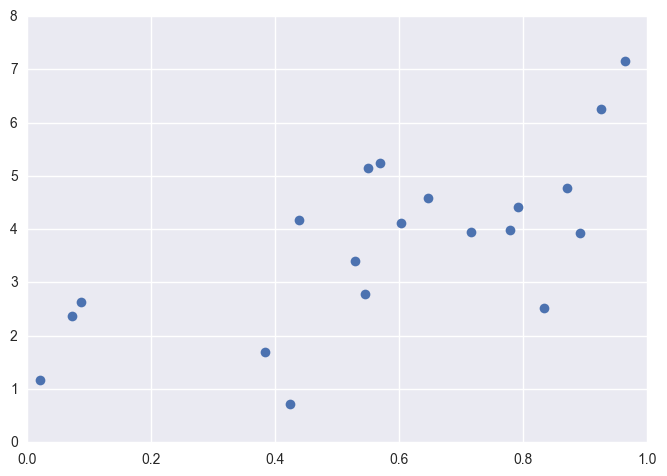

In [12]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

As above, we can plot a line of best fit:

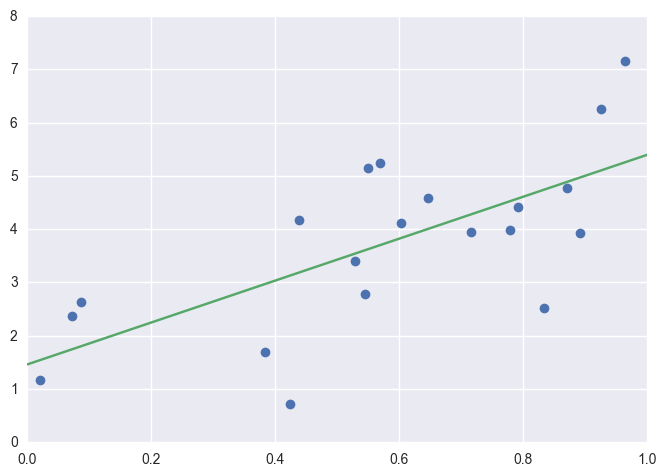

In [15]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Scikit-learn also has some more sophisticated models, which can respond to finer features in the data:

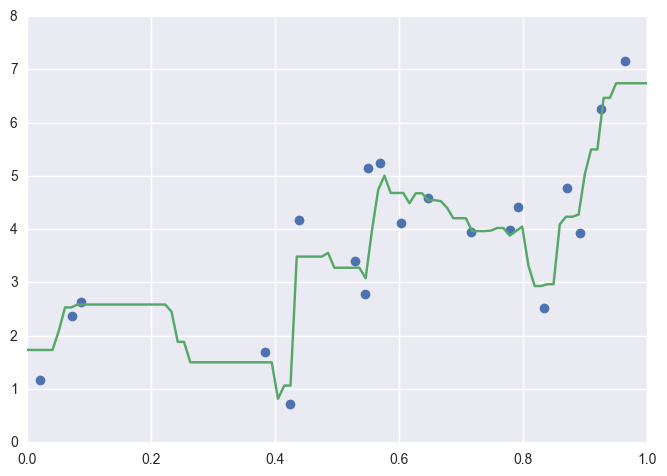

In [16]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Whether either of these is a "good" fit or not depends on a number of things; we'll discuss details of how to choose a model later in the course.

---

#### Exercise

Explore the ``RandomForestRegressor`` object using IPython's help features (i.e. put a question mark after the object).
What arguments are available to ``RandomForestRegressor``?
How does the above plot change if you change these arguments?

These class-level arguments are known as *hyperparameters*, and we will discuss later how you to select hyperparameters in the model validation section.

---

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

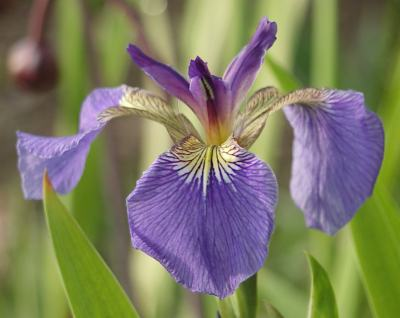

Iris Setosa



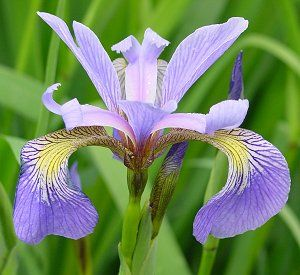

Iris Versicolor



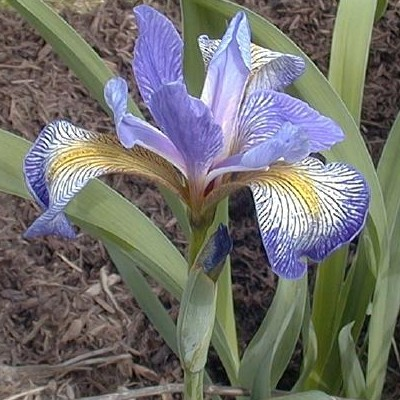

Iris Virginica


In [17]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

In [19]:
iris.keys()

dict_keys(['target', 'feature_names', 'data', 'DESCR', 'target_names'])

In [20]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [21]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [22]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

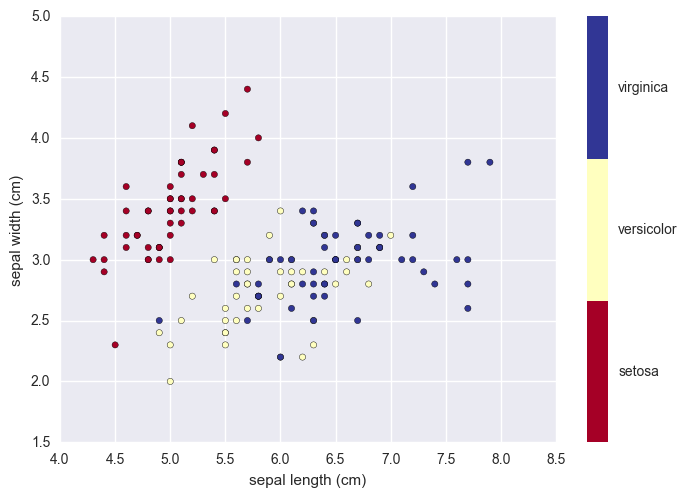

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()
model.fit(X=iris.data,y=iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
model.predict(iris.data[0:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

## confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

What can we learn from this matrix?

There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
In reality, 105 patients in the sample have the disease, and 60 patients do not.
Let's now define the most basic terms, which are whole numbers (not rates):

* <b>true positives (TP):</b> These are cases in which we predicted yes (they have the disease), and they do have the disease.
* <b>true negatives (TN):</b> We predicted no, and they don't have the disease.
* <b>false positives (FP):</b> We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* <b>false negatives (FN):</b> We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

<img src="images/gKyb9.png" width = 520ptx height = 220ptx> 

In [39]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [41]:
confusion_matrix(y_pred=model.predict(iris.data),y_true=iris.target)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [43]:
accuracy_score(y_pred=model.predict(iris.data),y_true=iris.target)

0.95999999999999996

## Other Available Data
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.

## Excersice 

Implement the regression algoritms on boston house pricing dataset

In [45]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)
